In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=50
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
import seaborn as sns
%matplotlib inline

# Loading Voice Dataset

In [2]:
data=pd.read_csv("voice.csv",index_col=None)
#test=pd.read_csv("census-income.test",index_col=None)

In [3]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB
None
          meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  

In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Conveting the Gender to 0 or 1 class

In [5]:
data.loc[data.label.str.strip()=="male",'label']=1
data.loc[data.label.str.strip()=="female",'label']=0

In [6]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


# Data Visualization of Voice dataset

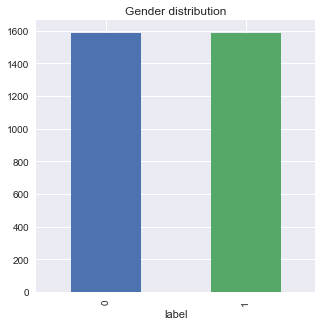

In [7]:
c=data.groupby(['label']).size()
c.plot(kind='bar',figsize=(5,5),title="Gender distribution")

The data is sampled equally for both the genders

//anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


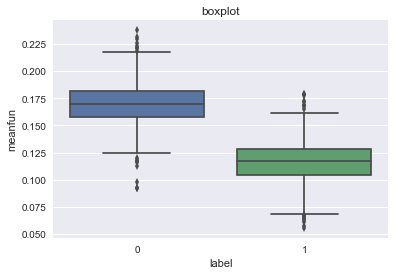

In [8]:
sns.boxplot(x="label",y="meanfun",data=data)
plt.title("boxplot")
plt.show()


We use Boxplots to compare the distrubutions of the data

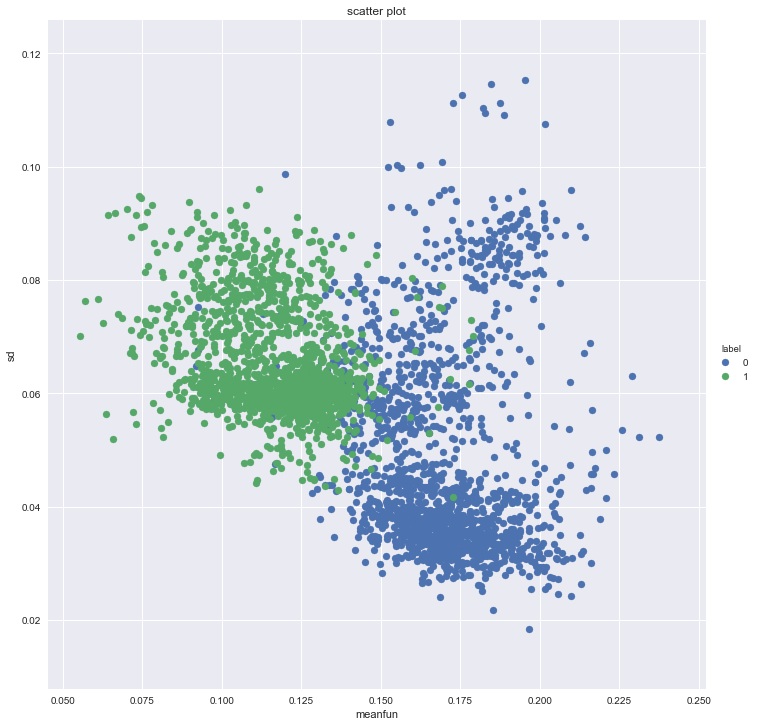

In [9]:
sns.FacetGrid(data, hue="label", size=10)\
   .map(plt.scatter, "meanfun", "sd")\
   .add_legend()
plt.title("scatter plot")
plt.show()

Scatter plots are used to visualize a decision boundary between the data

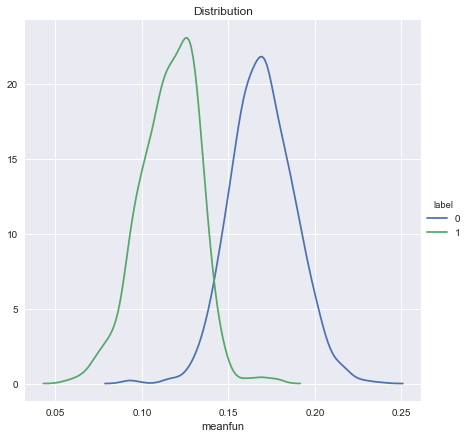

In [10]:
sns.FacetGrid(data, hue="label", size=6) \
   .map(sns.kdeplot, "meanfun") \
   .add_legend()
plt.title("Distribution")
plt.show()

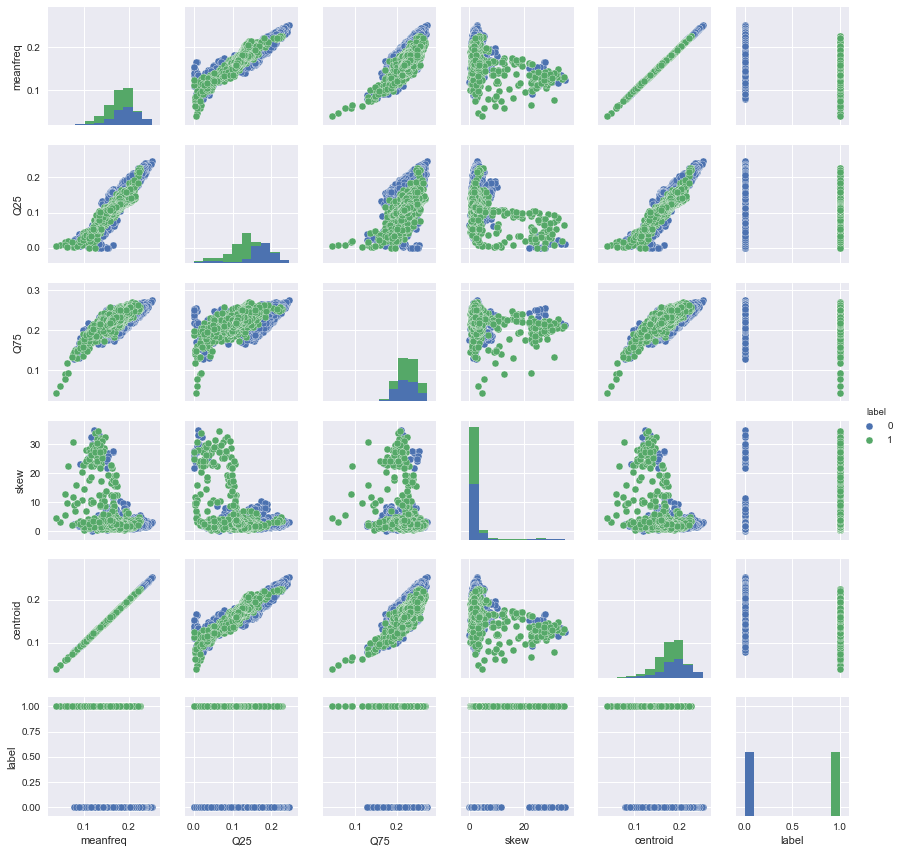

In [11]:
sns.pairplot(data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)

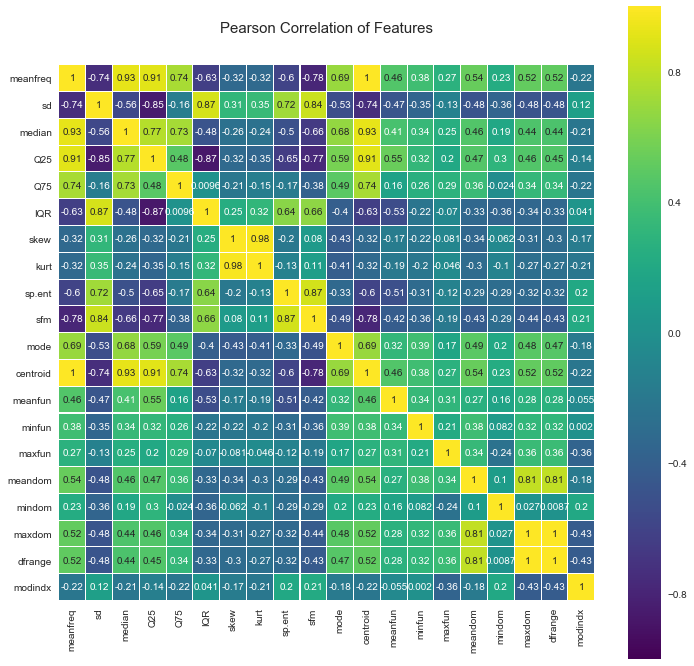

In [12]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score,recall_score,roc_auc_score
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold, StratifiedKFold
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

//anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Test train split

In [14]:
X=data.drop('label',axis=1)
Y=data.label
Y=Y.astype(int)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25 ,random_state=168)

The test train data is split into 25% and 75%

# Decision Tree Classifier

In [32]:
dtc=DecisionTreeClassifier(random_state=2018)
dtc.fit(X_train,y_train)
predictions_tr = dtc.predict(X_train)
print("Accuracy score for Decision predection scores- on Train",accuracy_score(y_train, predictions_tr))
print("Area under curve for Decision predection scores- Train",roc_auc_score(y_train, predictions_tr))
predictions1 = dtc.predict(X_test)
predictions_prob = dtc.predict_proba(X_test)
print("Accuracy score for Decision predection scores- Test",accuracy_score(y_test, predictions1))
print("Area under curve for Decision predection scores- Test",roc_auc_score(y_test, predictions_prob[:,1]))

Accuracy score for Decision predection scores- on Train 1.0
Area under curve for Decision predection scores- Train 1.0
Accuracy score for Decision predection scores- Test 0.967171717172
Area under curve for Decision predection scores- Test 0.967005205675


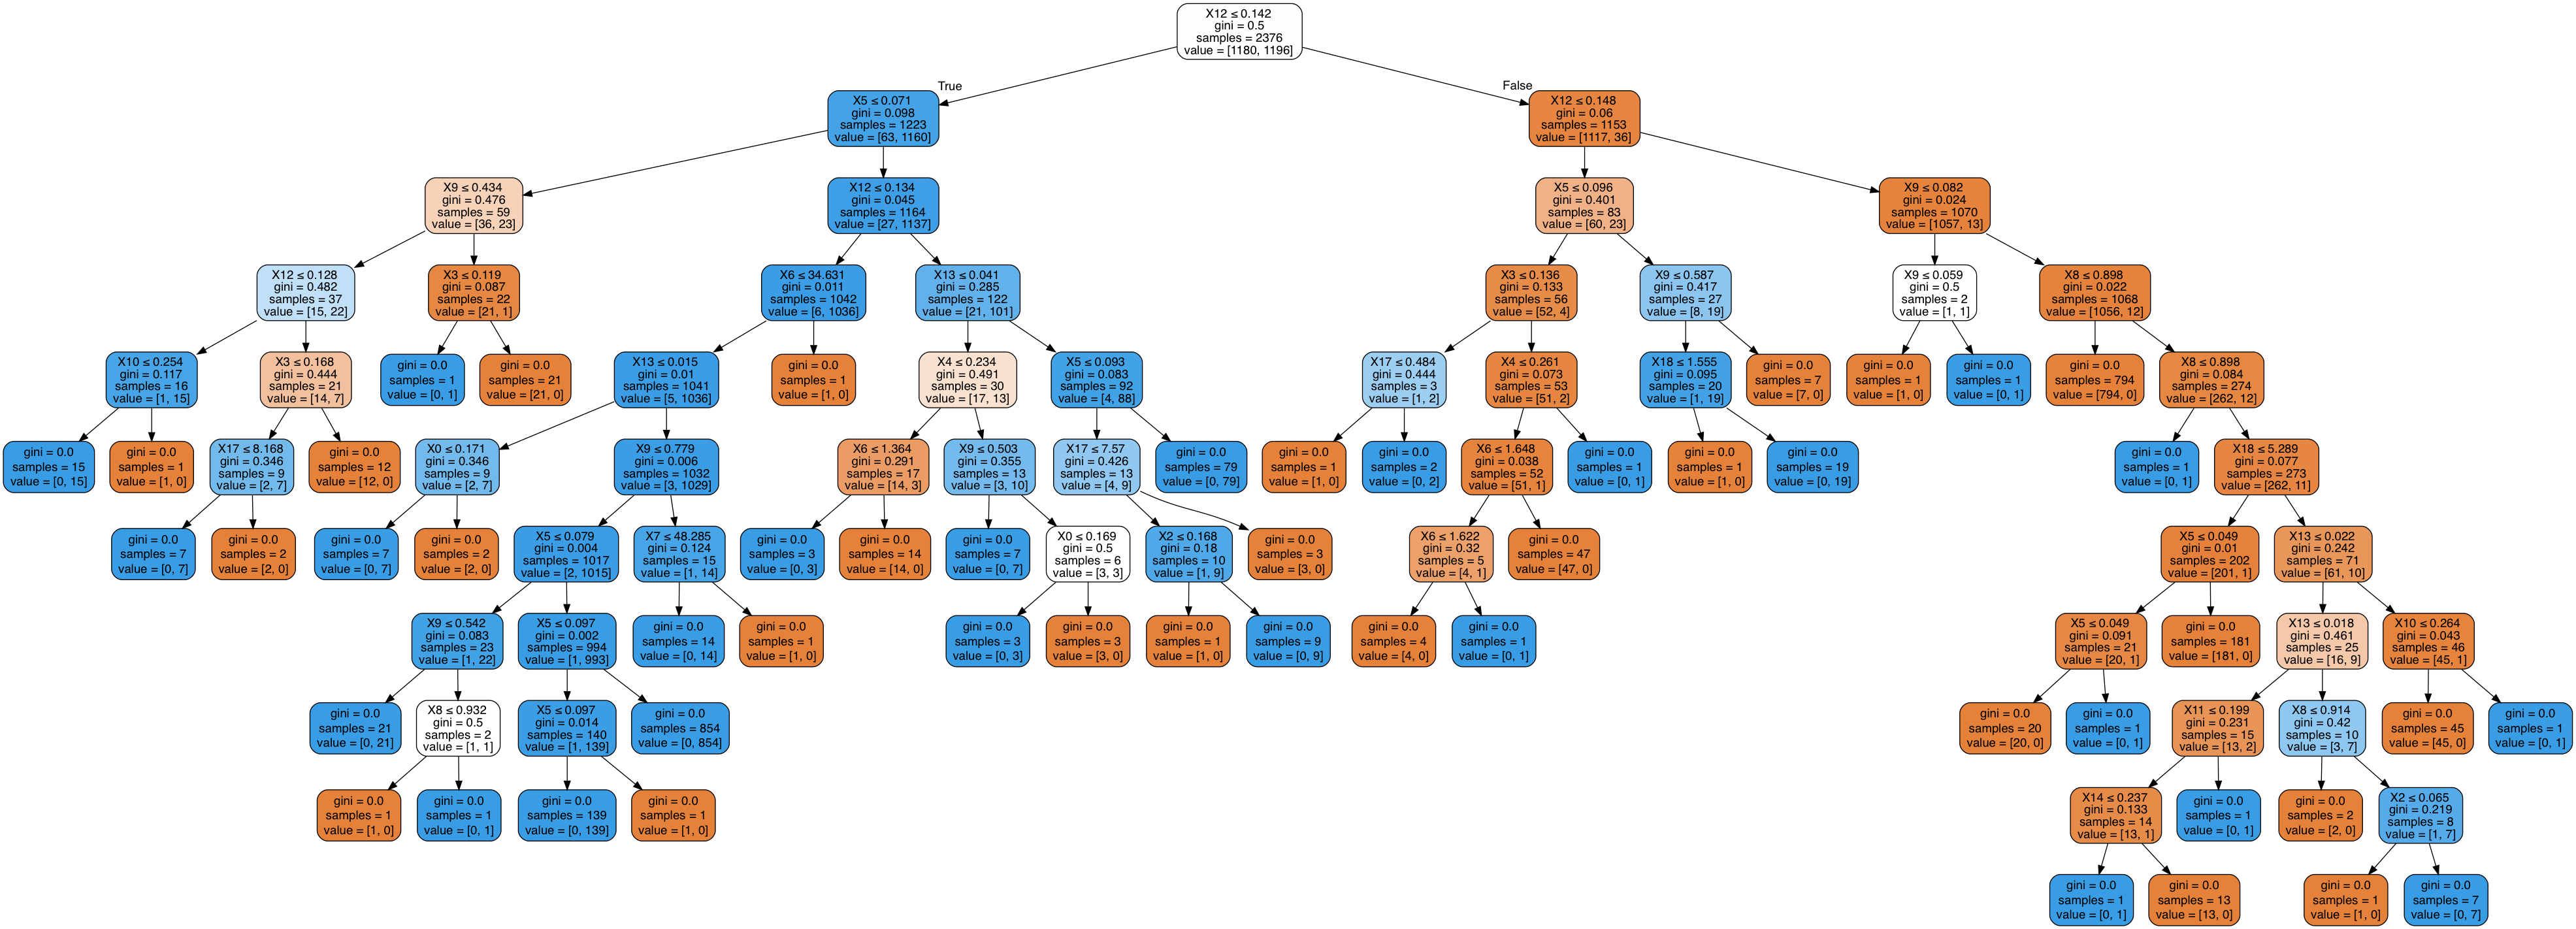

In [33]:
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions1)
print("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (cm[0, 0],
                                   cm[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (cm[1, 0],
                                   cm[1, 1]))
print ("         |-----|-----|")

Confusion Matrix  <function confusion_matrix at 0x120cf51e0>
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 394 |  10 |
Actual   |-----|-----|
       1 |  16 | 372 |
         |-----|-----|


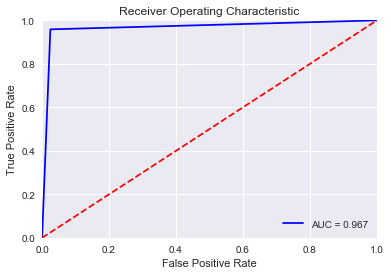

In [35]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [36]:
random_forest = RandomForestClassifier(random_state=2018, n_estimators=1000, max_features='auto', criterion='gini',
                                       max_depth=5, min_samples_split=2, min_samples_leaf=5)
random_forest.fit(X_train,y_train)
predictions_tr= random_forest.predict(X_train)
print("Accuracy for Random Forest predection scores on Train-",accuracy_score(y_train, predictions_tr))
print("Area under curve for Random Forest predection scores Train-",roc_auc_score(y_train, predictions_tr))

predictions = random_forest.predict(X_test)
predictions_prob = random_forest.predict_proba(X_test)
print("Accuracy for Random Forest predection scores on Test-",accuracy_score(y_test, predictions))
print("Area under curve for Random Forest predection scores Test-",roc_auc_score(y_test, predictions_prob[:,1]))

Accuracy for Random Forest predection scores on Train- 0.981481481481
Area under curve for Random Forest predection scores Train- 0.981435292784
Accuracy for Random Forest predection scores on Test- 0.972222222222
Area under curve for Random Forest predection scores Test- 0.996089364091


In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)
print("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (cm[0, 0],
                                   cm[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (cm[1, 0],
                                   cm[1, 1]))
print ("         |-----|-----|")

Confusion Matrix  <function confusion_matrix at 0x120cf51e0>
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 393 |  11 |
Actual   |-----|-----|
       1 |  11 | 377 |
         |-----|-----|


In [38]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

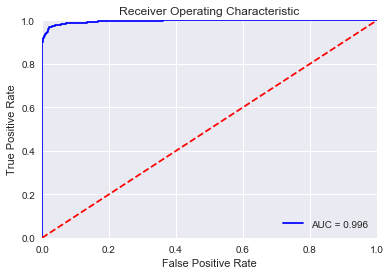

In [39]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature Importance

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score,recall_score,roc_auc_score
from sklearn.grid_search import GridSearchCV

In [41]:
clf = RandomForestClassifier()
dat=data.drop('label',axis=1)
y=data.label
y=y.astype(int)

clf.fit(dat,y)
predictions = clf.predict(dat)


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. fea1ure %s (%f)" % (f + 1, dat.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. fea1ure meanfun (0.277912)
2. fea1ure IQR (0.275567)
3. fea1ure Q25 (0.173777)
4. fea1ure sd (0.068677)
5. fea1ure sp.ent (0.043935)
6. fea1ure sfm (0.039285)
7. fea1ure mode (0.015387)
8. fea1ure skew (0.012149)
9. fea1ure maxdom (0.010878)
10. fea1ure median (0.010745)


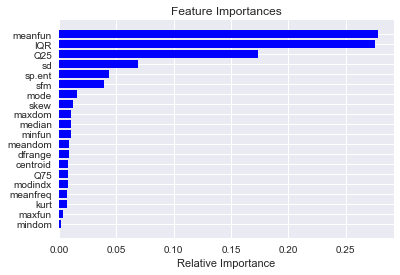

In [47]:
features = dat.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()